# CHARISMA: Demonstration of Chada library

In [49]:
from ramanchada import chada,chada_utilities,chada_io

Create a CHADA archive from native Raman file

In [50]:
#Set paths
import os, os.path

TEST_FILES = "test"
HOME=os.path.expanduser("~")

if os.name == 'nt':
     HOME = os.path.join(os.path.expanduser("~"),"Desktop")
        
import shutil
native_file = os.path.join(HOME,"200218-17.wdf")
if native_file:
    shutil.copy(os.path.join(TEST_FILES,"200218-17.wdf"),native_file)

assert(os.path.exists(native_file))
print(native_file)

C:\Users\jelia\Desktop\200218-17.wdf


In [51]:
chada_file = chada_io.create(native_file)

print(native_file,chada_file)
assert(os.path.exists(chada_file))

C:\Users\jelia\Desktop\200218-17.wdf C:\Users\jelia\Desktop\200218-17.cha


Load CHADA archive into Chada object

In [52]:
C = chada.Chada(chada_file)

Show unprocessed data

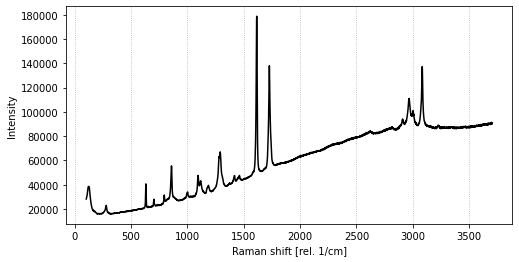

In [53]:
C.plot()

There are commits just as in GIT

In [54]:
C.commits

['Generated CHADA on Wed May 26 14:19:45 2021']

Show metadata

In [55]:
C.metadata

{'DIMENSION_LABELS': "['Raman shift [1/cm]' 'Counts']",
 'Generated on': 'Wed May 26 14:19:45 2021',
 'OEM software name': 'WiRE',
 'OEM software version': '[5, 2, 0, 9499]',
 'Original file': '200218-17.wdf',
 'laser wavelength': '514.5011961147924',
 'no. of accumulations': '3',
 'spectral unit': 'Counts'}

Now separate a baseline

In [56]:
#C.baseline(show=True)
#'Chada' object has no attribute 'baseline'  - apparently it was refactored, see next cells


In [57]:
C.fit_baseline()
C.remove_baseline()

The data has been updated

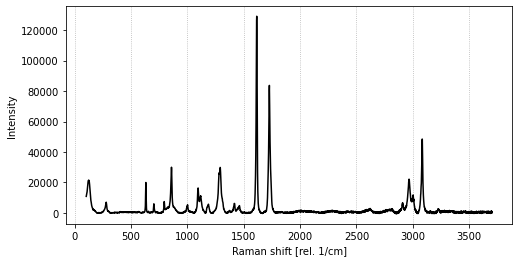

In [58]:
C.plot()

In [59]:
import pandas as pd

The baseline separation appears in the transformers list

In [60]:
pd.Series(C.transformers)

0    [remove_baseline, [17507.101438406287, 17487.8...
dtype: object

In [61]:
C.metadata

{'DIMENSION_LABELS': "['Raman shift [1/cm]' 'Counts']",
 'Generated on': 'Wed May 26 14:19:45 2021',
 'OEM software name': 'WiRE',
 'OEM software version': '[5, 2, 0, 9499]',
 'Original file': '200218-17.wdf',
 'laser wavelength': '514.5011961147924',
 'no. of accumulations': '3',
 'spectral unit': 'Counts'}

The dynamic metadata changes

In [62]:
#C.dynamic_metadata
#there is no more dynamic_metadata method

Crop spectrum k direction

In [63]:
C.x_crop(500, 2500)

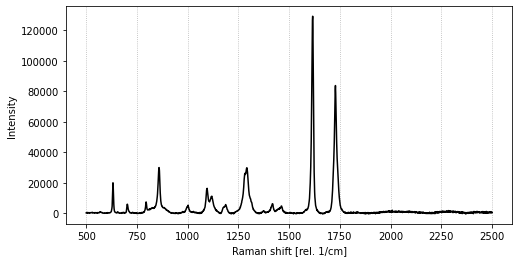

In [64]:
C.plot()

In [65]:
pd.Series(C.transformers)

0    [remove_baseline, [17507.101438406287, 17487.8...
1                                  [x_crop, 500, 2500]
dtype: object

In [66]:
#C.dynamic_metadata

In [67]:
C.metadata

{'DIMENSION_LABELS': "['Raman shift [1/cm]' 'Counts']",
 'Generated on': 'Wed May 26 14:19:45 2021',
 'OEM software name': 'WiRE',
 'OEM software version': '[5, 2, 0, 9499]',
 'Original file': '200218-17.wdf',
 'laser wavelength': '514.5011961147924',
 'no. of accumulations': '3',
 'spectral unit': 'Counts'}

Area normalization

In [68]:
C.normalize('area')

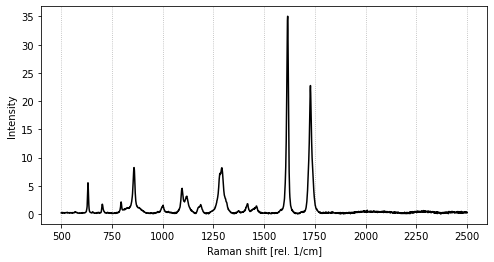

In [69]:
C.plot()

In [70]:
pd.Series(C.transformers)

0    [remove_baseline, [17507.101438406287, 17487.8...
1                                  [x_crop, 500, 2500]
2                                    [normalize, area]
dtype: object

In [71]:
#C.dynamic_metadata
C.metadata

{'DIMENSION_LABELS': "['Raman shift [1/cm]' 'Counts']",
 'Generated on': 'Wed May 26 14:19:45 2021',
 'OEM software name': 'WiRE',
 'OEM software version': '[5, 2, 0, 9499]',
 'Original file': '200218-17.wdf',
 'laser wavelength': '514.5011961147924',
 'no. of accumulations': '3',
 'spectral unit': 'Counts'}

Peak search - this doesn't change the data

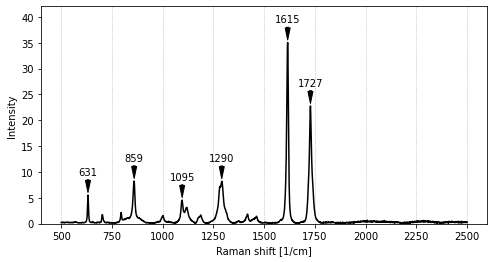

In [72]:
C.peaks(make_plot=True)

The bands list can be extended and exported e.g. to Excel

In [73]:
C.bands

,peak pos [1/cm],peak_heights,prominences,left_bases,right_bases
0,631.638672,0.157273,0.154298,591.667969,754.384766
1,859.189453,0.234517,0.232821,754.384766,1521.193359
2,1095.613281,0.129223,0.128436,952.021484,1226.312500
3,1290.794922,0.233453,0.232817,952.021484,1521.193359
4,1615.630859,1.000000,0.999523,1521.193359,2368.562500
5,1727.773438,0.649378,0.649344,1664.765625,2368.562500


Now we commit. The CHADA file is updated on disk.

In [74]:
C.commit("First round of processing")

Kill the current CHADA object

In [75]:
del C

In [76]:
#this is a test that C is undefined
try: 
    C
except NameError: 
    C = None
assert C==None

Make new Chada object from udated CHADA archive

In [77]:
#D = Chada(r"C:\Users\barton\Desktop\chada\200218-17.cha")
assert(os.path.exists(chada_file))
#print(chada_file)
D = chada.Chada(chada_file)

The data is exactly in the state where we made the commit

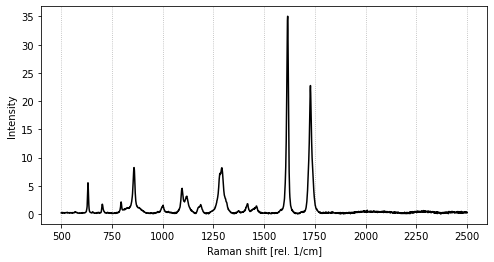

In [78]:
D.plot()

In [79]:
D.commits

['Generated CHADA on Wed May 26 14:19:45 2021', 'First round of processing']

In [80]:
pd.Series(D.transformers)

0    [remove_baseline, [17507.101438406287, 17487.8...
1                                  [x_crop, 500, 2500]
2                                    [normalize, area]
dtype: object

All processing steps can be reverted

Let's go one step back

In [81]:
D.rewind(-1)

In [82]:
pd.Series(D.transformers)

0    [remove_baseline, [17507.101438406287, 17487.8...
1                                  [x_crop, 500, 2500]
dtype: object

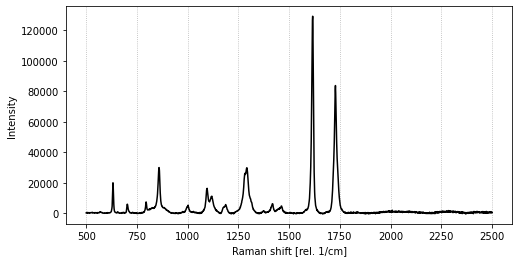

In [83]:
D.plot()

And now all the way to the original data

In [84]:
D.rewind(0)

In [85]:
pd.Series(D.transformers)

<ipython-input-85-3dc5e5344720>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(D.transformers)


Series([], dtype: float64)

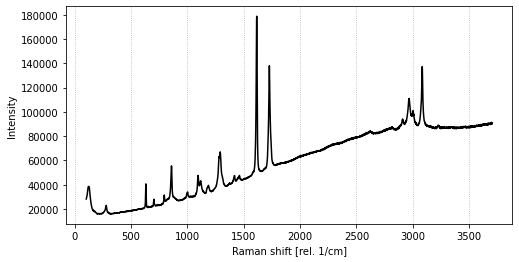

In [86]:
D.plot()

Create a CHADA archive from native Raman file

In [87]:
DATA_FILES = "\\vm-stor-51\alle\Projekte Kunststoffe\RD\MA\Öffentliche_Projekte\2020-01-07_230007_H2020-CHARISMA_barton\Python\charisma-raman-spectrum-harmonization\test_data\\"
DATA_FILES = TEST_FILES

#not sure where to get this file from 
test_file = "SILICON_x20_1%_02.spc"
#so using this one instead
test_file = "Si100NoDope_S02.spc"
assert(os.path.exists(os.path.join(DATA_FILES,test_file)))
chada_file = chada_io.create(os.path.join(DATA_FILES,test_file))
assert(os.path.exists(chada_file))
print(chada_file)

x-y(1)
test\Si100NoDope_S02.cha


Load CHADA archive into Chada object

In [88]:
E = chada.Chada(chada_file)

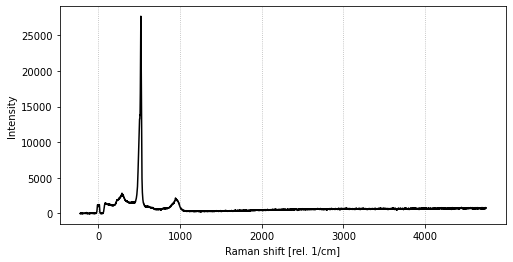

In [89]:
E.plot()

Show metadata

In [90]:
#E.static_metadata

In [91]:
#E.dynamic_metadata

In [92]:
#E.baseline(show=True)
E.fit_baseline()
E.remove_baseline()

Crop spectrum k direction

In [93]:
E.x_crop(200, 1200)

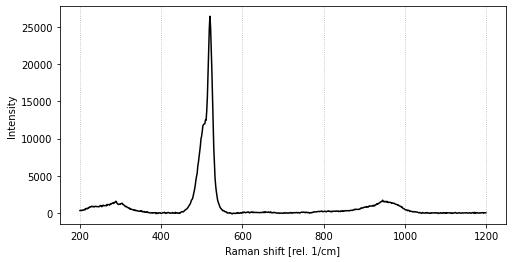

In [94]:
E.plot()

Area normalization

In [95]:
E.normalize('area')

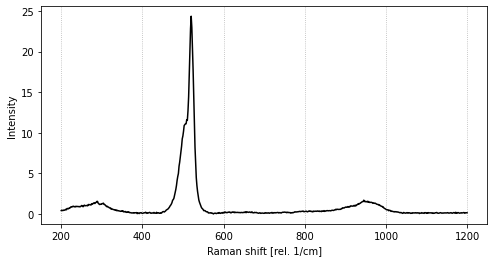

In [96]:
E.plot()

Peak search - this doesn't change the data

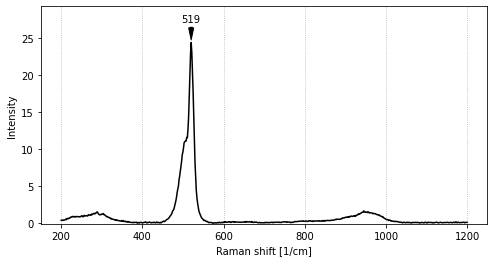

In [97]:
E.peaks(make_plot=True)